# ML WORKSHOP 1
## What we will learn today
* Basic Pandas Dataframe and Numpy concepts
* Importing Data from a file
* Cleaning Up the data
* Visualize the data
* Use one hot encoding
* Normalizing the data
* Train Test the model using skleanrs Linear Regression
* How good is the trained model?
* Implement Multivariate Linear Regression from scratch
* How well does it perform compared sklearns implementation

## What DATA are we using
For this demo we will be using data from Ames Housing 2011.
Link: https://github.com/bipindr123/ML_workshop/blob/main/AmesHousing.txt 

Details about this data can be found here. Link: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset

In [3]:
#Import the dataset
dataframe = pd.read_table('AmesHousing.txt',delimiter='\t')

#check the shape of the data
dataframe.shape

(2930, 82)

In [4]:
dataframe.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
dataframe.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
#Accessing a column
dataframe['Sale Condition']

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
2925    Normal
2926    Normal
2927    Normal
2928    Normal
2929    Normal
Name: Sale Condition, Length: 2930, dtype: object

In [7]:
#
dataframe['Sale Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

## Cleaning up the data

We are goind to get rid of any columns that are not necessary

In [8]:
#Select rows with the sale condision as normal 
dataframe = dataframe[dataframe['Sale Condition']=='Normal']

In [9]:
dataframe = dataframe.drop(columns=['Order','PID','Sale Condition'])
dataframe.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,5,2010,WD,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,189900


In [10]:
dataframe.shape

(2413, 79)

## Visualizing the data

### See the correlation between the data and the target

In [11]:
dataframe.corr().style.background_gradient(cmap="Reds")

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.441746,-0.191558,0.068003,-0.080646,0.062136,0.065639,0.016993,-0.077030,-0.076280,-0.107253,-0.221030,-0.263653,0.310583,0.014453,0.073438,-0.007429,-0.018440,0.145065,0.188043,-0.036352,0.253641,0.031201,-0.044490,0.120277,-0.022668,-0.079298,-0.015158,-0.006337,-0.027816,-0.044622,-0.053057,-0.014235,-0.029727,0.010851,-0.029120,-0.075709
Lot Frontage,-0.441746,1.000000,0.462089,0.167798,-0.055776,0.086930,0.051321,0.207820,0.177774,0.061007,0.092235,0.299163,0.442428,-0.003118,-0.007793,0.336966,0.110382,-0.019559,0.163300,0.019749,0.251211,0.013280,0.336865,0.243337,0.039883,0.298639,0.336014,0.117497,0.136296,0.006062,0.031879,0.091090,0.090923,0.020926,-0.011370,0.007716,0.369866
Lot Area,-0.191558,0.462089,1.000000,0.067532,-0.027162,0.006124,0.008021,0.087272,0.160341,0.081785,0.009937,0.208979,0.305419,0.015046,0.002631,0.245113,0.121156,0.025744,0.119138,0.010567,0.138169,-0.013489,0.195085,0.238730,-0.021596,0.167315,0.186596,0.155443,0.077613,0.013904,0.019470,0.041161,0.054212,0.041802,0.006364,-0.010991,0.275066
Overall Qual,0.068003,0.167798,0.067532,1.000000,-0.088451,0.558466,0.528869,0.382604,0.264189,-0.017106,0.242979,0.509793,0.429640,0.258499,-0.043452,0.548335,0.168644,-0.045104,0.502008,0.270053,0.080846,-0.152778,0.354043,0.387746,0.542825,0.566571,0.519567,0.255170,0.289371,-0.128832,0.007394,0.049575,-0.001041,-0.023618,0.005135,0.024592,0.787391
Overall Cond,-0.080646,-0.055776,-0.027162,-0.088451,1.000000,-0.401441,0.077628,-0.137120,-0.061792,0.024492,-0.119951,-0.174781,-0.148817,0.015210,0.020292,-0.097675,-0.063770,0.093256,-0.211857,-0.093117,-0.003191,-0.084272,-0.069388,-0.041855,-0.335386,-0.191226,-0.157989,0.012843,-0.061918,0.075561,0.046109,0.056840,-0.023354,0.044292,0.032749,0.007729,-0.091301
Year Built,0.062136,0.086930,0.006124,0.558466,-0.401441,1.000000,0.553736,0.301065,0.306141,0.002035,0.069964,0.384244,0.273809,0.019209,-0.128611,0.212556,0.232123,-0.026484,0.441418,0.274389,-0.042448,-0.137998,0.084034,0.159663,0.824577,0.507273,0.449060,0.230688,0.179258,-0.350614,0.003625,-0.047387,0.006820,-0.023632,-0.017846,0.038560,0.533158
Year Remod/Add,0.065639,0.051321,0.008021,0.528869,0.077628,0.553736,1.000000,0.161229,0.145703,-0.036242,0.111660,0.246728,0.192806,0.176841,-0.057088,0.295869,0.145086,-0.040949,0.423727,0.212427,-0.004705,-0.147731,0.179453,0.116828,0.608102,0.376348,0.325602,0.221542,0.230339,-0.199115,0.024203,-0.045184,-0.018150,-0.013033,0.002066,0.086802,0.501806
Mas Vnr Area,0.016993,0.207820,0.087272,0.382604,-0.137120,0.301065,0.161229,1.000000,0.256372,-0.001420,0.075282,0.337315,0.335093,0.135901,-0.053499,0.368007,0.116195,-0.000973,0.249116,0.193128,0.110498,-0.034974,0.249284,0.233588,0.237015,0.333300,0.328018,0.146701,0.129552,-0.100082,0.003853,0.059211,-0.002951,-0.020596,-0.019042,-0.018042,0.488343
BsmtFin SF 1,-0.077030,0.177774,0.160341,0.264189,-0.061792,0.306141,0.145703,0.256372,1.000000,-0.056542,-0.480950,0.503563,0.409100,-0.182032,-0.070325,0.144313,0.626172,0.063990,0.078874,-0.028080,-0.103669,-0.121341,-0.000230,0.277913,0.207348,0.255927,0.287893,0.224876,0.103896,-0.106979,0.033259,0.098125,0.019648,0.017008,-0.014037,0.024375,0.454087
BsmtFin SF 2,-0.076280,0.061007,0.081785,-0.017106,0.024492,0.002035,-0.036242,-0.001420,-0.056542,1.000000,-0.245955,0.124824,0.105568,-0.111235,-0.004097,-0.017750,0.178966,0.101338,-0.068651,-0.034660,-0.041664,-0.043616,-0.050672,0.055912,-0.033568,0.002728,0.026812,0.100710,-0.010560,0.004354,-0.023156,0.053678,0.058090,-0.0

In [12]:
q = dataframe.corr()

In [13]:
q['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.787391
Gr Liv Area        0.736036
Total Bsmt SF      0.642354
1st Flr SF         0.634672
Garage Cars        0.632429
Garage Area        0.621900
Full Bath          0.548635
Year Built         0.533158
Garage Yr Blt      0.507703
Year Remod/Add     0.501806
TotRms AbvGrd      0.496512
Fireplaces         0.493381
Mas Vnr Area       0.488343
BsmtFin SF 1       0.454087
Lot Frontage       0.369866
Wood Deck SF       0.350127
Open Porch SF      0.326489
2nd Flr SF         0.293338
Half Bath          0.292314
Bsmt Full Bath     0.287817
Lot Area           0.275066
Bedroom AbvGr      0.183634
Bsmt Unf SF        0.159724
Screen Porch       0.116638
BsmtFin SF 2       0.038346
Pool Area          0.035708
Yr Sold            0.022632
3Ssn Porch         0.016059
Mo Sold            0.001497
Misc Val          -0.016680
Low Qual Fin SF   -0.025790
Bsmt Half Bath    -0.028877
MS SubClass       -0.075709
Overall Cond      -0.091301
Kitchen AbvGr     -0

## Plot Overall Qual against SalePrice

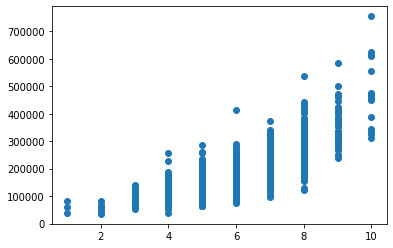

In [16]:
plt.scatter(dataframe['Overall Qual'],dataframe['SalePrice'])

array([[<AxesSubplot:title={'center':'MS SubClass'}>,
        <AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>,
        <AxesSubplot:title={'center':'Overall Cond'}>,
        <AxesSubplot:title={'center':'Year Built'}>],
       [<AxesSubplot:title={'center':'Year Remod/Add'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 2'}>,
        <AxesSubplot:title={'center':'Bsmt Unf SF'}>,
        <AxesSubplot:title={'center':'Total Bsmt SF'}>],
       [<AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>,
        <AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Bsmt Full Bath'}>,
        <AxesSubplot:title={'center':'Bsmt Half Bath'}>],
       [<A

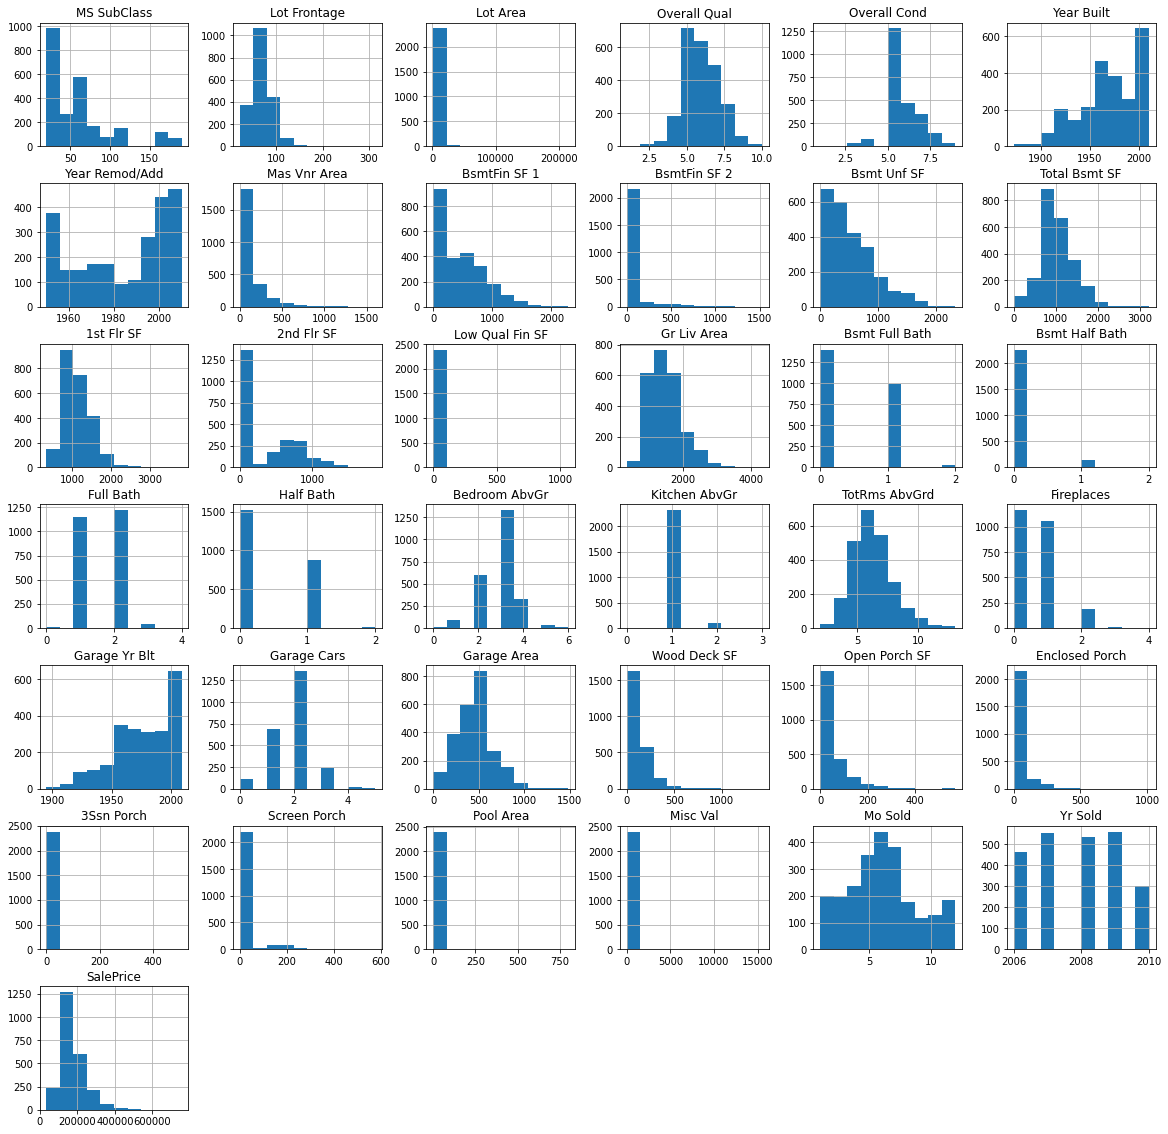

In [26]:
dataframe.hist(figsize=(20,20))

## One hot encoding the data

Since our data has many columns that are categorical, we would need to make it all numerical. One way is to use One Hot enconding

In [10]:
categoricalf = [col for col in dataframe if dataframe[col].dtype.name=='object' or col=='MS SubClass']

In [11]:
dataframe = pd.get_dummies(dataframe,columns=categoricalf,prefix=categoricalf,dummy_na=True)

In [12]:
dataframe.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Type_nan
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,0,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,0,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,0,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
dataframe.shape

(2413, 347)

### Get rid of any values that are not available

In [14]:
dataframe.dropna(inplace=True)

In [15]:
dataframe.shape

(1848, 347)

## Normalizing the dataframe

In [16]:
#Before that lets convert it to a NumPy Array
columns = dataframe.columns
X = dataframe.to_numpy()

In [17]:
stddevs = np.std(X,axis=0)+1e-6
X /= stddevs

In [18]:
dataframe = pd.DataFrame(X)
dataframe.columns = columns

In [19]:
dataframe.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Type_nan
count,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,...,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.0
mean,3.031951,1.438203,4.531384,5.185727,65.540609,95.926255,0.550833,1.027421,0.317094,1.297903,...,0.132744,0.065937,0.046574,0.096355,0.040323,0.057072,0.023267,0.023267,4.966529,0.0
std,1.000271,1.000271,1.000270,1.000270,1.000271,1.000271,1.000271,1.000271,1.000271,1.000271,...,1.000263,1.000255,1.000249,1.000260,1.000246,1.000253,1.000228,1.000228,1.000266,0.0
min,0.926634,0.192728,0.747078,0.915828,62.533453,94.309649,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.559274,1.076722,3.735390,4.579140,64.929626,94.974653,0.000000,0.000000,0.000000,0.523652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.167875,0.0
50%,3.000528,1.373709,4.482468,4.579140,65.595230,96.340934,0.000000,0.894359,0.000000,1.096155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.167875,0.0
75%,3.530033,1.651201,5.229547,5.494968,66.493795,96.872937,0.836583,1.689147,0.000000,1.868229,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.167875,0.0
max,13.811256,31.910634,7.470781,8.242452,66.893157,97.211485,9.028891,5.456784,8.356536,5.566560,...,7.665945,15.231457,21.517022,10.474391,24.838900,17.578179,42.998157,42.998157,5.167875,0.0


In [20]:
#Seperate target from data
Y = dataframe['SalePrice']
dataframe = dataframe.drop(columns=['SalePrice'])

In [21]:
Y.head()

0    2.936213
1    1.433964
2    2.348970
3    3.332260
4    2.593427
Name: SalePrice, dtype: float64

## Split the data for Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataframe, Y, test_size=0.2, random_state=69)

## Train the model

In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

## Predict the values for testing data

In [24]:
y_hat = LR.predict(x_test)
y_hat

array([2.95703125e+00, 2.08203125e+00, 1.33593750e+00, 1.90234375e+00,
       3.00781250e+00, 1.94921875e+00, 2.07812500e+00, 2.71875000e+00,
       2.19140625e+00, 3.61718750e+00, 1.68359375e+00, 2.00000000e+00,
       2.46093750e+00, 3.34375000e+00, 1.46875000e+00, 3.20312500e+00,
       1.85156250e+00, 1.66015625e+00, 2.68750000e+00, 2.27343750e+00,
       3.89062500e+00, 1.80468750e+00, 2.69531250e+00, 2.58593750e+00,
       1.37890625e+00, 1.60156250e+00, 3.57812500e+00, 3.53515625e+00,
       2.31640625e+00, 2.98828125e+00, 3.57812500e+00, 1.73437500e+00,
       2.08203125e+00, 2.01562500e+00, 8.98437500e-01, 2.93750000e+00,
       3.42187500e+00, 1.59765625e+00, 1.84375000e+00, 2.25000000e+00,
       3.84765625e+00, 2.59765625e+00, 1.60937500e+00, 4.98828125e+00,
       1.92968750e+00, 1.84765625e+00, 4.67187500e+00, 2.32812500e+00,
       2.59375000e+00, 2.11328125e+00, 2.24218750e+00, 2.33593750e+00,
       2.42187500e+00, 2.71875000e+00, 2.17187500e+00, 2.02734375e+00,
      

## How well did the model Perform

We calculate the performance of the linear regression model with MSE(Mean Sqared Error)

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

3.2121033706293214e+22

## Lets implement linear Regression from scratch


In [26]:
#Convert all dataframes to numpy arrays
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [27]:
### Add a column of ones to the x_train and x_test which will contain the bias or b from (y=mx+b)

In [28]:
def addones(X):
    return np.append(X,np.ones((X.shape[0],1)), axis=1)
    
newtrainX = addones(x_train)
newtestX = addones(x_test)

In [29]:
newtrainX[:,-1]

array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
def linearRegression(X,Y):
        w = np.linalg.pinv(X)@Y
        return w

### Now we will fit the model/ get the weights

In [31]:
w = linearRegression(newtrainX,y_train)

### Our predictions will be

In [32]:
y_pred = newtestX@w
y_pred

array([2.96221868, 2.08750538, 1.33998046, 1.91351783, 3.02146421,
       1.96913721, 2.0771114 , 2.71904447, 2.2005427 , 3.60440752,
       1.7037917 , 2.00749733, 2.47325144, 3.34954101, 1.4999397 ,
       3.21306553, 1.87273648, 1.66109795, 2.71638011, 2.28038975,
       3.8912961 , 1.81297599, 2.70133347, 2.59068772, 1.37275462,
       1.61179794, 3.60003496, 3.53960358, 2.33619143, 2.99842881,
       3.58228607, 1.72677903, 2.11024193, 2.01809761, 0.91215845,
       2.93697776, 3.42742227, 1.62376305, 1.87457118, 2.24545471,
       3.86426553, 2.61023052, 1.62806157, 4.98887528, 1.94506915,
       1.85608008, 4.6757924 , 2.32607836, 2.60843805, 2.11892857,
       2.23867315, 2.348565  , 2.43384581, 2.71058573, 2.18482628,
       2.0648887 , 1.61105817, 2.3298196 , 5.28201244, 1.7931796 ,
       2.37822421, 2.00107845, 1.46574168, 5.70588902, 2.0039568 ,
       1.90709237, 2.26390366, 1.2914248 , 2.38752169, 1.09426241,
       1.60301902, 2.21307856, 2.22789974, 4.21345051, 1.60522

## How well did our model perform

In [33]:
def meansqerr(Y,y_pred):
    return np.mean((y_pred-Y)**2)

print(meansqerr(y_pred,y_test))

0.06014279871792865


In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.06014279871792865

(370,)

## The model we implemented from scatch performed better